<a href="https://colab.research.google.com/github/sipocz/I4_0/blob/main/I4_0__linear.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
from google.colab import drive
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import ElasticNet
from sklearn.linear_model import Lasso



In [3]:
!wget "https://raw.githubusercontent.com/sipocz/DataFrame_Graph/main/grafikon.py"
!rm grafikon.py.*
from grafikon import grafikon

--2024-02-12 19:23:07--  https://raw.githubusercontent.com/sipocz/DataFrame_Graph/main/grafikon.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 2539 (2.5K) [text/plain]
Saving to: ‘grafikon.py.1’

grafikon.py.1       100%[===================>]   2.48K  --.-KB/s    in 0s      

2024-02-12 19:23:07 (31.1 MB/s) - ‘grafikon.py.1’ saved [2539/2539]



In [4]:
drive.mount('/content/drive', readonly=True,force_remount=True )

Mounted at /content/drive


In [5]:
user = "SL"

In [6]:

if user=="NKF":
    path = "/content/drive/MyDrive/*"
else:
    path = "/content/drive/MyDrive/adatok_szakdoga/adatok_20210201_20240101/df_osszes.csv"

In [7]:
df_osszes=pd.read_csv(path,)

In [8]:
df_osszes["Timestamp"]=pd.to_datetime(df_osszes["Timestamp"], format="%Y-%m-%d %H:%M:%S")

In [9]:
df_osszes.set_index("Timestamp",inplace=True)

In [10]:
del(df_osszes["Unnamed: 0"] )

In [11]:
df_osszes["Szum_metanol"]=df_osszes["Meleg_tartaly_szint"]+df_osszes["Hideg_tartaly_szint"]

In [12]:
#df_osszes=df_osszes.astype(int)

In [13]:
df_mini = df_osszes.filter(['Szum_metanol','Szteroid2_uni_rhv_hom','Szteroid2_2_rhv_hom','Szteroid2_krom_rhv_hom','Szteroid_sp_rhv_hom','Szteroid_nor12_rhv_hom','Szteroid_thf1_rhv_hom','Szteroid_thf2_rhv_hom','Szteroid_merk_rhv_hom','Szintetikus3_1_rhv_hom','Szintetikus3_2_rhv_hom','Szintetikus3_3_rhv_hom','Szintetikus3_4_rhv_hom','Szintetikus3_hidr_rhv_hom','Szintetikus1_1_rhv_hom','Szintetikus1_2_rhv_hom','Szintetikus1_3_rhv_hom','Szintetikus1_4_rhv_hom','Szintetikus1_5_rhv_hom','Szintetikus1_6_rhv_hom','Oldoszer_rhv_elore_hom','Szintetikus3_rhv_elore_hom''Szter_Szter2_Tfl_rhv_elore_hom','Szintetikus1_elore_hom'], axis=1)

In [14]:
df_mini.describe()

,Szum_metanol,Szteroid2_uni_rhv_hom,Szteroid2_2_rhv_hom,Szteroid2_krom_rhv_hom,Szteroid_sp_rhv_hom,Szteroid_nor12_rhv_hom,Szteroid_thf1_rhv_hom,Szteroid_thf2_rhv_hom,Szteroid_merk_rhv_hom,Szintetikus3_1_rhv_hom,...,Szintetikus3_3_rhv_hom,Szintetikus3_4_rhv_hom,Szintetikus3_hidr_rhv_hom,Szintetikus1_1_rhv_hom,Szintetikus1_2_rhv_hom,Szintetikus1_3_rhv_hom,Szintetikus1_4_rhv_hom,Szintetikus1_5_rhv_hom,Szintetikus1_6_rhv_hom,Oldoszer_rhv_elore_hom
count,1.531950e+06,1.531950e+06,1.531950e+06,1.531950e+06,1.531950e+06,1.531950e+06,1.531950e+06,1.531950e+06,1.531950e+06,1.531950e+06,...,1.531950e+06,1.531950e+06,1.531950e+06,1.531950e+06,1.531950e+06,1.531950e+06,1.531950e+06,1.531950e+06,1.531950e+06,1.531950e+06
mean,1.037296e+02,1.791602e+01,1.866796e+01,1.842537e+01,1.779770e+01,1.735590e+01,2.066038e+01,1.786041e+01,1.774129e+01,1.906506e+01,...,1.772424e+01,1.855604e+01,2.046158e+01,2.103953e+01,1.996895e+01,2.076945e+01,2.163324e+01,2.079118e+01,1.990206e+01,1.956564e+01
std,1.210746e+01,3.938346e+00,3.974075e+00,4.476605e+00,3.776185e+00,3.746389e+00,4.717789e+00,4.145986e+00,3.863727e+00,3.571611e+00,...,3.894463e+00,4.098838e+00,6.005507e+00,4.374065e+00,3.781432e+00,4.050601e+00,4.918608e+00,3.974792e+00,4.257373e+00,4.580713e+00
min,0.000000e+00,0.000000e+00,-5.000000e+01,-2.508000e+01,-2.504000e+01,-2.501000e+01,-1.900024e-01,-1.700020e-01,-5.000000e+01,0.000000e+00,...,-2.511500e+01,-2.512500e+01,-5.000000e+01,-5.000000e+01,-5.000000e+01,-4.282000e+01,-5.000000e+01,-5.000000e+01,-4.500198e-02,0.000000e+00
25%,9.548014e+01,1.514000e+01,1.587500e+01,1.525000e+01,1.509000e+01,1.463499e+01,1.781000e+01,1.492001e+01,1.492499e+01,1.675000e+01,...,1.497500e+01,1.569500e+01,1.662500e+01,1.844247e+01,1.760008e+01,1.815500e+01,1.879000e+01,1.880000e+01,1.747500e+01,1.707154e+01
50%,1.030017e+02,1.855500e+01,1.905500e+01,1.887500e+01,1.857500e+01,1.813500e+01,2.014500e+01,1.847500e+01,1.834000e+01,1.944000e+01,...,1.828000e+01,1.898000e+01,1.985000e+01,2.146022e+01,2.060105e+01,2.040000e+01,2.155500e+01,2.110001e+01,2.088000e+01,2.070333e+01
75%,1.111282e+02,2.078500e+01,2.104500e+01,2.073000e+01,2.055000e+01,2.024500e+01,2.306500e+01,2.040000e+01,2.040000e+01,2.118500e+01,...,2.026500e+01,2.077000e+01,2.321250e+01,2.363088e+01,2.258063e+01,2.335000e+01,2.423500e+01,2.311250e+01,2.275000e+01,2.259892e+01
max,1.526011e+02,5.000000e+01,5.000000e+01,5.000000e+01,5.000000e+01,5.000000e+01,5.000000e+01,5.000000e+01,4.989000e+01,5.995000e+01,...,5.000000e+01,5.000000e+01,5.000000e+01,5.000000e+01,5.000000e+01,5.000000e+01,5.000000e+01,5.000000e+01,5.000000e+01,3.870854e+01


<module 'matplotlib.pyplot' from '/usr/local/lib/python3.10/dist-packages/matplotlib/pyplot.py'>

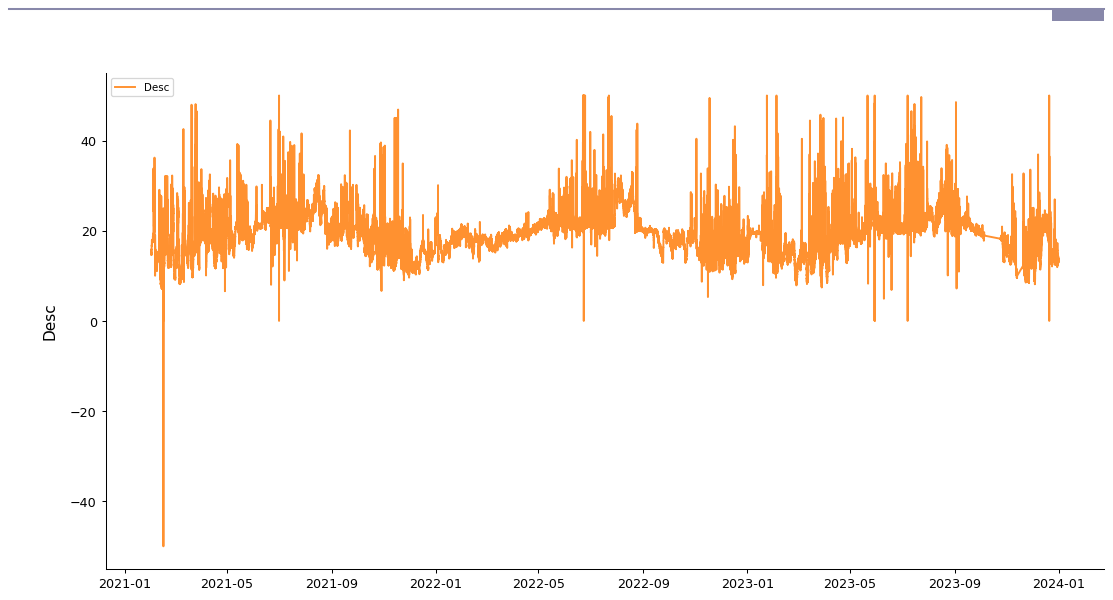

In [15]:
grafikon(df_mini,"Szteroid2_2_rhv_hom","Desc")

In [16]:
df_mini=df_mini[df_mini.Szteroid2_2_rhv_hom>-45.0]

<module 'matplotlib.pyplot' from '/usr/local/lib/python3.10/dist-packages/matplotlib/pyplot.py'>

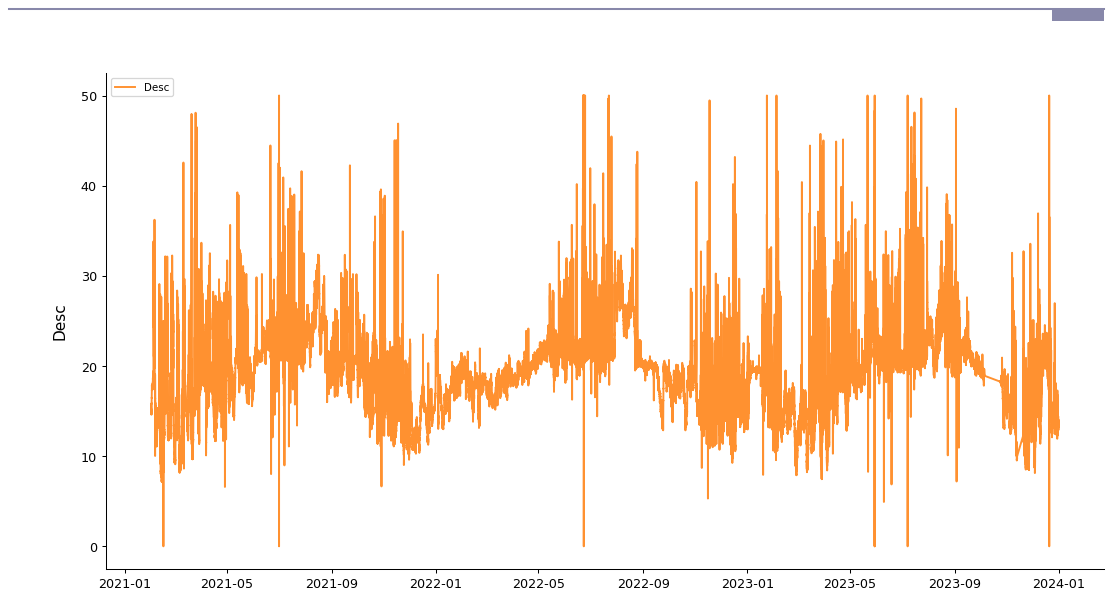

In [17]:
grafikon(df_mini,"Szteroid2_2_rhv_hom","Desc")

In [18]:
y=df_mini.Szum_metanol
X=df_mini.filter(['Szteroid2_uni_rhv_hom','Szteroid2_2_rhv_hom','Szteroid2_krom_rhv_hom','Szteroid_sp_rhv_hom','Szteroid_nor12_rhv_hom','Szteroid_thf1_rhv_hom','Szteroid_thf2_rhv_hom','Szteroid_merk_rhv_hom','Szintetikus3_1_rhv_hom','Szintetikus3_2_rhv_hom','Szintetikus3_3_rhv_hom','Szintetikus3_4_rhv_hom','Szintetikus3_hidr_rhv_hom','Szintetikus1_1_rhv_hom','Szintetikus1_2_rhv_hom','Szintetikus1_3_rhv_hom','Szintetikus1_4_rhv_hom','Szintetikus1_5_rhv_hom','Szintetikus1_6_rhv_hom','Oldoszer_rhv_elore_hom','Szintetikus3_rhv_elore_hom''Szter_Szter2_Tfl_rhv_elore_hom','Szintetikus1_elore_hom'])

In [19]:
linreg=LinearRegression()

In [20]:
linreg.fit(X,y)

LinearRegression()

In [21]:
linreg.score(X,y)

0.08371514665402136

In [22]:
y_pred=linreg.predict(X)

In [23]:
linreg_df=pd.DataFrame({"real":y,"predicted":y_pred})

<module 'matplotlib.pyplot' from '/usr/local/lib/python3.10/dist-packages/matplotlib/pyplot.py'>

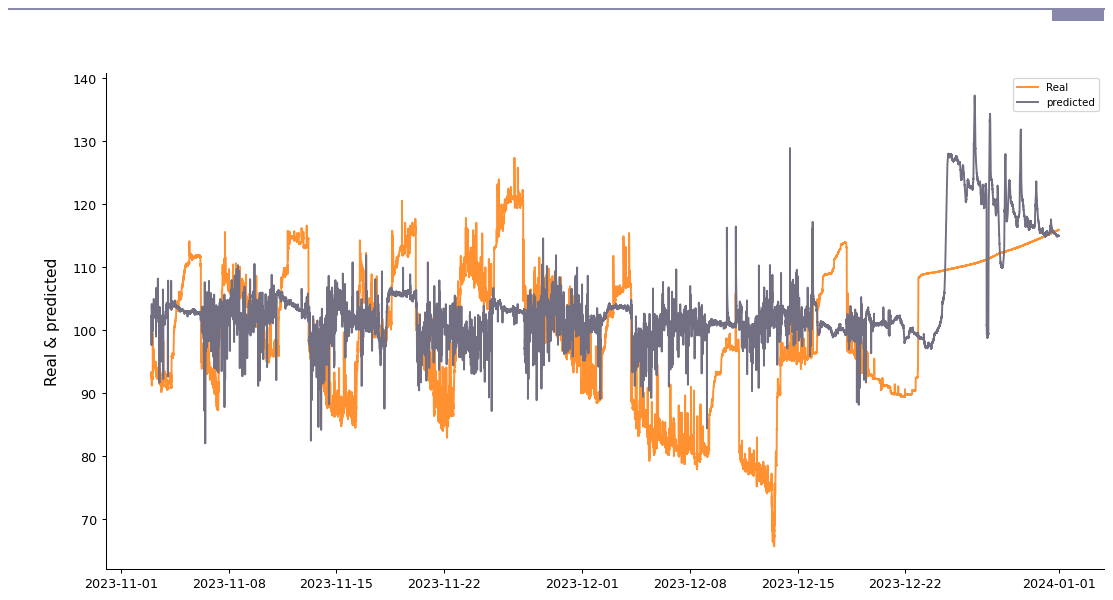

In [24]:
grafikon(linreg_df[-85000:],"real","Real","predicted","predicted",n_graf=2)

In [25]:
from sklearn.ensemble import AdaBoostRegressor

# diff

In [26]:
Ereg=LinearRegression()

In [27]:
ydiff=y.diff()[1:]
Xdiff=X.diff()[1:]

In [28]:
Ereg.fit(Xdiff,ydiff)

LinearRegression()

In [29]:
Ereg.score(Xdiff,ydiff)

3.17590955782876e-05

In [30]:
y_pred=Ereg.predict(Xdiff)

In [31]:
Ereg_df=pd.DataFrame({"real":ydiff,"predicted":y_pred})

<module 'matplotlib.pyplot' from '/usr/local/lib/python3.10/dist-packages/matplotlib/pyplot.py'>

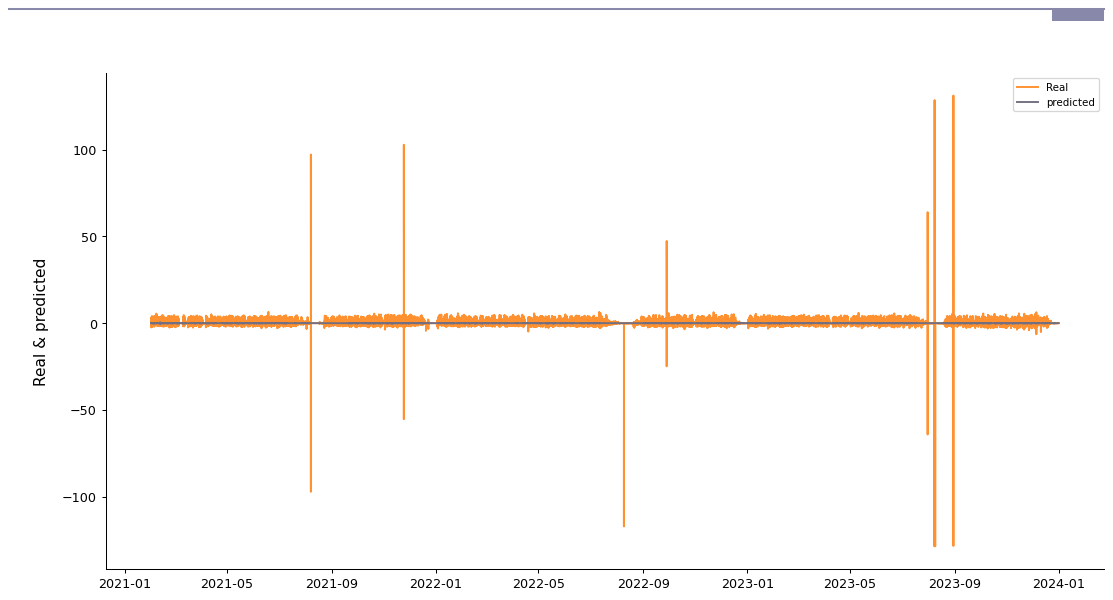

In [32]:
grafikon(Ereg_df[:],"real","Real","predicted","predicted",n_graf=2)

#ötlet: nézzük meg, hogy a szint változás hogyan alakul a jövőben?

In [33]:
y_aggr=ydiff.rolling(window=60).sum()   # 60 perc

In [34]:
y_aggr.dropna(inplace=True)

In [35]:
len(y_aggr)

1531889

In [36]:
Xredim=X[:len(y_aggr)-len(X)]

In [37]:
len(Xredim)

1531889

In [38]:
y_sign=y_aggr.gt(0)

#Classifiers

In [39]:
from sklearn.linear_model import RidgeClassifierCV

In [40]:
A_class=RidgeClassifierCV()

In [41]:
print(len(Xredim))
print(len(y_sign))

1531889
1531889


In [42]:
A_class.fit(Xredim,y_sign)

RidgeClassifierCV()

In [43]:
A_class.score(Xredim,y_sign)

0.5460669800488156

In [44]:
y_pred=A_class.predict(Xredim)

In [45]:
A_class_df=pd.DataFrame({"real":y_sign,"predicted":y_pred})

<module 'matplotlib.pyplot' from '/usr/local/lib/python3.10/dist-packages/matplotlib/pyplot.py'>

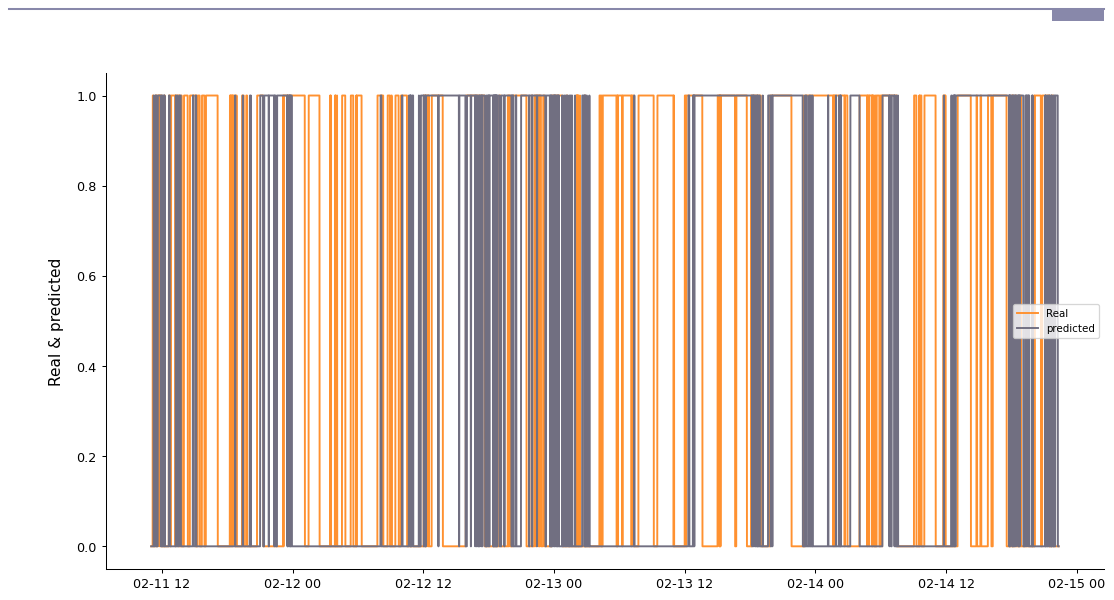

In [46]:
grafikon(A_class_df[15000:20000],"real","Real","predicted","predicted",n_graf=2)

#LazyPredict

In [47]:
!pip install lazypredict

In [48]:
from lazypredict.Supervised import LazyClassifier

In [49]:
from sklearn.model_selection import train_test_split

In [50]:
clf=LazyClassifier()

In [51]:
X_train, X_test, y_train, y_test = train_test_split(Xredim[:10000], y_sign[:10000],test_size=.2,random_state =123)

In [52]:
clf.fit(X_train, X_test, y_train, y_test)

 97%|█████████▋| 28/29 [00:53<00:01,  1.25s/it]

[LightGBM] [Info] Number of positive: 3900, number of negative: 4100
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001796 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 5092
[LightGBM] [Info] Number of data points in the train set: 8000, number of used features: 20
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.487500 -> initscore=-0.050010
[LightGBM] [Info] Start training from score -0.050010


100%|██████████| 29/29 [00:53<00:00,  1.85s/it]


(                               Accuracy  Balanced Accuracy  ROC AUC  F1 Score  \
 Model                                                                           
 ExtraTreesClassifier               0.94               0.94     0.94      0.94   
 RandomForestClassifier             0.94               0.94     0.94      0.94   
 XGBClassifier                      0.92               0.92     0.92      0.92   
 BaggingClassifier                  0.92               0.92     0.92      0.92   
 LGBMClassifier                     0.91               0.91     0.91      0.91   
 DecisionTreeClassifier             0.89               0.89     0.89      0.89   
 KNeighborsClassifier               0.88               0.88     0.88      0.88   
 LabelPropagation                   0.88               0.88     0.88      0.88   
 LabelSpreading                     0.88               0.88     0.88      0.88   
 ExtraTreeClassifier                0.87               0.87     0.87      0.87   
 NuSVC          

#ETreeClass


In [53]:
from sklearn.ensemble import ExtraTreesClassifier

In [54]:
X_train, X_test, y_train, y_test = train_test_split(Xredim, y_sign,test_size=.5,random_state =123)

In [55]:
A_class=ExtraTreesClassifier(n_estimators=2) # n_estimators=100 --> 1.0 ;

In [56]:
print(len(Xredim))
print(len(y_sign))

1531889
1531889


In [57]:
A_class.fit(X_train,y_train)

ExtraTreesClassifier(n_estimators=2)

In [58]:
A_class.score(X_test,y_test)

0.8274380014230787

In [59]:
y_pred=A_class.predict(Xredim)

In [60]:
A_class_df=pd.DataFrame({"real":y_sign,"predicted":y_pred})

<module 'matplotlib.pyplot' from '/usr/local/lib/python3.10/dist-packages/matplotlib/pyplot.py'>

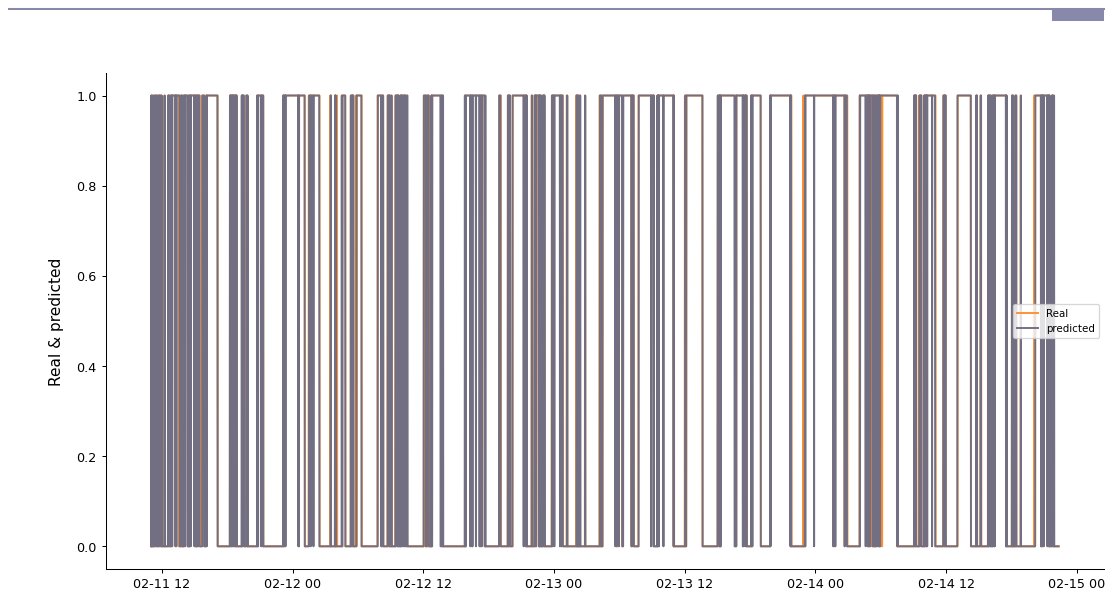

In [61]:
grafikon(A_class_df[15000:20000],"real","Real","predicted","predicted",n_graf=2)

#Nézzük meg mit mutat a lazyregressor
a legjobb az extratreesRegressor

In [62]:
from lazypredict.Supervised import LazyRegressor

In [63]:
clf2=LazyRegressor()

In [64]:
X_train, X_test, y_train, y_test = train_test_split(Xredim[:10000], y_aggr[:10000],test_size=.2,random_state =123)

In [65]:
clf2.fit(X_train, X_test, y_train, y_test)

 98%|█████████▊| 41/42 [01:36<00:01,  1.93s/it]

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001772 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 5092
[LightGBM] [Info] Number of data points in the train set: 8000, number of used features: 20
[LightGBM] [Info] Start training from score 0.105473


100%|██████████| 42/42 [01:36<00:00,  2.30s/it]


(                               Adjusted R-Squared  R-Squared  RMSE  Time Taken
 Model                                                                         
 ExtraTreesRegressor                          0.92       0.92  0.64        4.25
 RandomForestRegressor                        0.87       0.88  0.81       23.10
 BaggingRegressor                             0.85       0.85  0.89        2.15
 XGBRegressor                                 0.84       0.84  0.93        0.61
 KNeighborsRegressor                          0.77       0.77  1.10        0.21
 LGBMRegressor                                0.75       0.75  1.14        0.38
 HistGradientBoostingRegressor                0.75       0.75  1.15        0.65
 DecisionTreeRegressor                        0.74       0.75  1.15        0.39
 ExtraTreeRegressor                           0.68       0.68  1.30        0.13
 GradientBoostingRegressor                    0.48       0.48  1.65        4.42
 MLPRegressor                           

In [66]:
from sklearn.ensemble import ExtraTreesRegressor

In [67]:
etr=ExtraTreesRegressor()

In [68]:
X_train, X_test, y_train, y_test = train_test_split(Xredim[:10000], y_aggr[:10000],test_size=.2,random_state =123)

In [69]:
etr.fit(X_train,y_train)

ExtraTreesRegressor()

In [70]:
y_pred=etr.predict(Xredim)

In [71]:
etr.score(Xredim,y_aggr)

-0.24298578133576298

In [72]:
A_class_df=pd.DataFrame({"real":y_aggr,"predicted":y_pred})

<module 'matplotlib.pyplot' from '/usr/local/lib/python3.10/dist-packages/matplotlib/pyplot.py'>

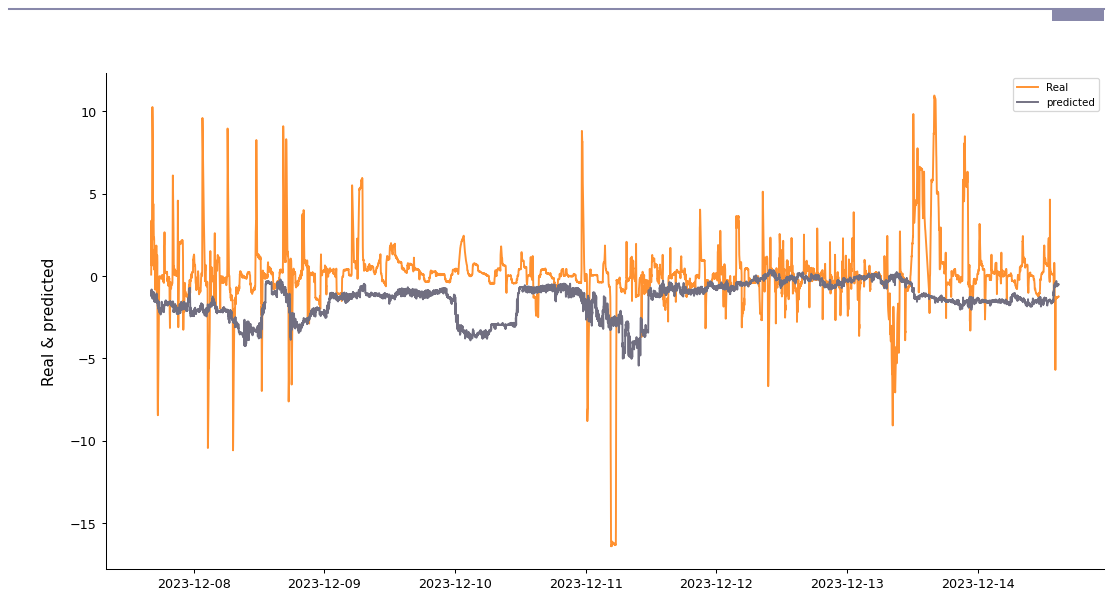

In [73]:
grafikon(A_class_df[-35000:-25000],"real","Real","predicted","predicted",n_graf=2)

#Eddig az első deriválttal foglalkoztunk, mi lenne az eredeti adattal az eredmény Nézzül ismét a Lazy-t

In [74]:
clf3=LazyRegressor()

In [75]:
X_train, X_test, y_train, y_test = train_test_split(X[:10000], y[:10000],test_size=.2,random_state =123)

In [76]:
clf3.fit(X_train, X_test, y_train, y_test)

 98%|█████████▊| 41/42 [01:31<00:01,  1.74s/it]

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001679 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 5092
[LightGBM] [Info] Number of data points in the train set: 8000, number of used features: 20
[LightGBM] [Info] Start training from score 111.397845


100%|██████████| 42/42 [01:32<00:00,  2.19s/it]


(                               Adjusted R-Squared  R-Squared   RMSE  \
 Model                                                                 
 ExtraTreesRegressor                          1.00       1.00   0.48   
 RandomForestRegressor                        1.00       1.00   0.70   
 BaggingRegressor                             1.00       1.00   0.74   
 XGBRegressor                                 1.00       1.00   0.75   
 DecisionTreeRegressor                        0.99       0.99   0.85   
 HistGradientBoostingRegressor                0.99       0.99   0.93   
 LGBMRegressor                                0.99       0.99   0.94   
 KNeighborsRegressor                          0.99       0.99   0.96   
 ExtraTreeRegressor                           0.99       0.99   0.99   
 GradientBoostingRegressor                    0.98       0.98   1.43   
 SVR                                          0.96       0.96   2.17   
 NuSVR                                        0.96       0.96   

In [94]:
from sklearn.svm import SVR

ImportError: cannot import name 'MLPRegressor' from 'sklearn.svm' (/usr/local/lib/python3.10/dist-packages/sklearn/svm/__init__.py)

In [78]:
svr=SVR(verbose=True)

In [79]:
X_train, X_test, y_train, y_test = train_test_split(X[:10000], y[:10000],test_size=.2,random_state =123)

In [81]:
svr.fit(X_train,y_train)

[LibSVM]

SVR(verbose=True)

In [85]:
y_pred=svr.predict(X_test)

In [86]:
etr.score(X_test,y_test)

-97.63647313125409

In [87]:
A_class_df=pd.DataFrame({"real":y_test,"predicted":y_pred})

In [92]:
A_class_df.sort_index(inplace=True)

<module 'matplotlib.pyplot' from '/usr/local/lib/python3.10/dist-packages/matplotlib/pyplot.py'>

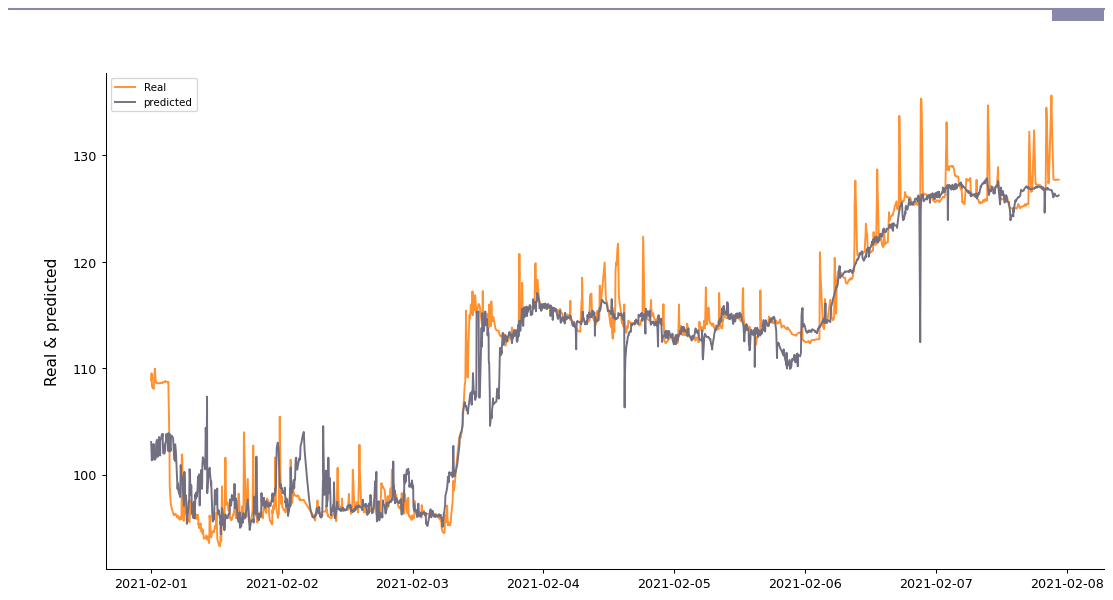

In [93]:
grafikon(A_class_df[:],"real","Real","predicted","predicted",n_graf=2)

#MLPRegressor

In [95]:
from sklearn.neural_network import MLPRegressor

In [107]:
mlpr=MLPRegressor(verbose=True,max_iter=100)

In [108]:
X_train, X_test, y_train, y_test = train_test_split(X[:], y[:],test_size=.2,random_state =123)

In [110]:
mlpr.fit(X_train,y_train)

Iteration 1, loss = 115.94161923
Iteration 2, loss = 59.85020783
Iteration 3, loss = 53.97974290
Iteration 4, loss = 50.96912066
Iteration 5, loss = 49.07739503
Iteration 6, loss = 47.93317440
Iteration 7, loss = 46.85932643
Iteration 8, loss = 46.07545010
Iteration 9, loss = 45.02853307
Iteration 10, loss = 44.43609075
Iteration 11, loss = 43.80436227
Iteration 12, loss = 43.41050322
Iteration 13, loss = 42.87552901
Iteration 14, loss = 42.36035988
Iteration 15, loss = 41.91700963
Iteration 16, loss = 41.51035975
Iteration 17, loss = 41.10944796
Iteration 18, loss = 40.61665266
Iteration 19, loss = 40.35878409
Iteration 20, loss = 40.07448173
Iteration 21, loss = 39.73867615
Iteration 22, loss = 39.39726197
Iteration 23, loss = 39.03894113
Iteration 24, loss = 38.78413633
Iteration 25, loss = 38.44110760
Iteration 26, loss = 38.21114998
Iteration 27, loss = 38.05954405
Iteration 28, loss = 37.85427851
Iteration 29, loss = 37.68184399
Iteration 30, loss = 37.49457353
Iteration 31, loss

MLPRegressor(verbose=True)

In [111]:
y_pred=mlpr.predict(X_test)

In [112]:
mlpr.score(X_test,y_test)

0.559920856754728

In [113]:
A_class_df=pd.DataFrame({"real":y_test,"predicted":y_pred})

In [114]:
A_class_df.sort_index(inplace=True)

<module 'matplotlib.pyplot' from '/usr/local/lib/python3.10/dist-packages/matplotlib/pyplot.py'>

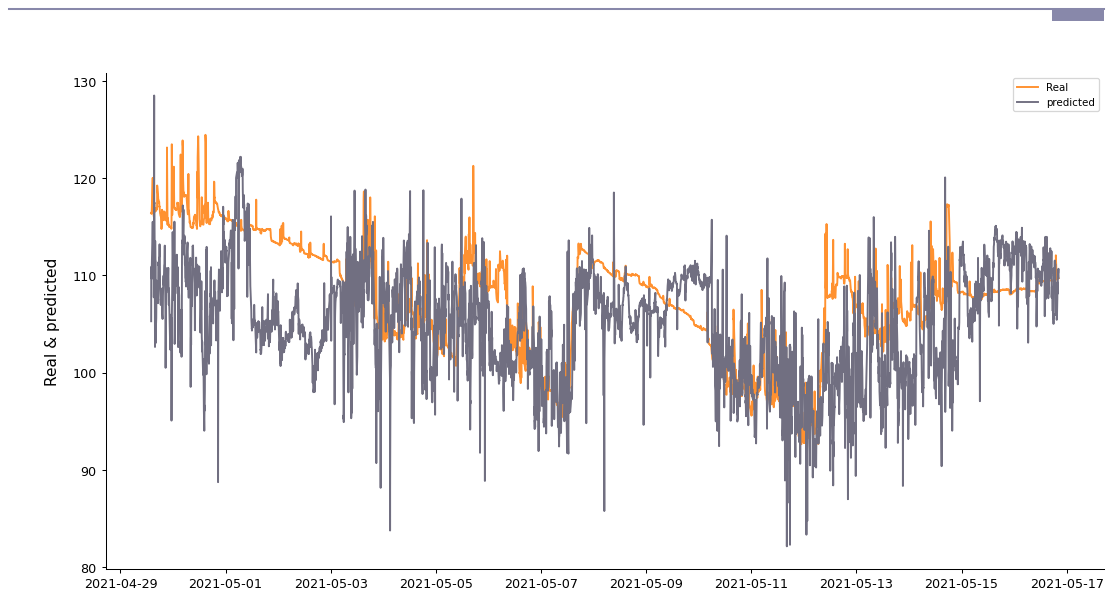

In [118]:
grafikon(A_class_df[25000:30000],"real","Real","predicted","predicted",n_graf=2)